# Support Vector Machine #

## 5.1 Linear SVM ##
**large margin classification**
### 5.1.1 soft margin classifcation ###
if some model is doing perfectly classification, it is call '**hard margin classification**' <br>
but that is could in linear data and it is sensitive to strange value. <br>
if avoid this is need for an adequate balance between keeping the breadth as wide as possible and margin violation. <br>
and model that does this is called '**soft margin classification**' 

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = np.array((iris['target'] == 2), dtype = np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss = 'hinge'))
])
svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 5.2 Non-linear SVM ##
one handling for non-linear datasets is add a polymorial features.

In [2]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ('polynomial_feature', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=2000))
])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomial_feature', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=2000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

### 5.2.1 polymorial kernel ###
low degree can't expression data and high degree make slow model <br>
for this reason, SVM use **kernel trick**

In [3]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM_clf', SVC(kernel = 'poly', degree=3, coef0 = 1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [4]:
import matplotlib.pyplot as plt

In [5]:
## https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

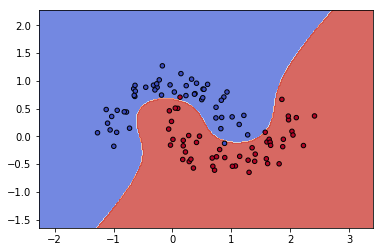

In [6]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
_, plot = plt.subplots(1)
plot_contours(plot, poly_kernel_svm_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plot.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.show()

In [7]:
def moon_scatter(X, y):
    _, plot = plt.subplots(1)
    for i in range(100):
        if y[i] == 1:
            marker, c = 'v','r'
        else:
            marker, c = 'o', 'b'
        plot.scatter(X[i,0], X[i,1], c=c, marker = marker)

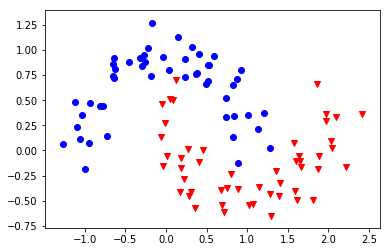

In [8]:
moon_scatter(X,y)

### 5.2.2 use simliarity ###
another handling is add similarity that how matched each sample to landmark. <br>
and that is can caculated from **similarity function**. <br>
<br>
use Radial Basis Function(RBF) to similarity function <br>
$ \ \phi_\gamma(x, \ell) = exp(-\gamma \|x-\ell\|^2) $



### 5.2.3 gaussian RBF kernel ###
svm can use RBF kernel like can use polymorial kernel


In [10]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

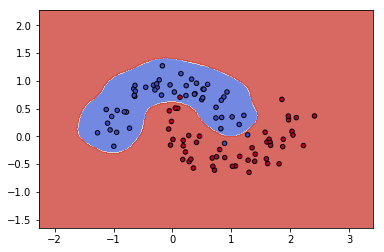

In [11]:
_, plot = plt.subplots(1)
plot_contours(plot, rbf_kernel_svm_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plot.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.show()

### 5.2.4 Time complexity ###
svc time-complexity : $ O(m^2 \times n) \sim O(m^3 \times n) $

## 5.3 SVM Regression ##


In [12]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [13]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = 'poly', gamma = 'auto', degree = 2, C = 100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## 5.4 SVM theory ##
(code skip)